In [1]:
! pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 579.2/579.2 kB 4.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 988.3/988.3 kB 10.8 MB/s eta 0:00:00a 0:00:01


In [2]:
import pandas as pd
import numpy as np

In [34]:
data_set = pd.read_csv('MaunaLoaDailyTemps.csv', index_col='DATE', parse_dates=True)
data_set.shape

(1825, 5)

In [35]:
data_set = data_set.dropna()

In [36]:
data_set.shape

(1821, 5)

<AxesSubplot: xlabel='DATE'>

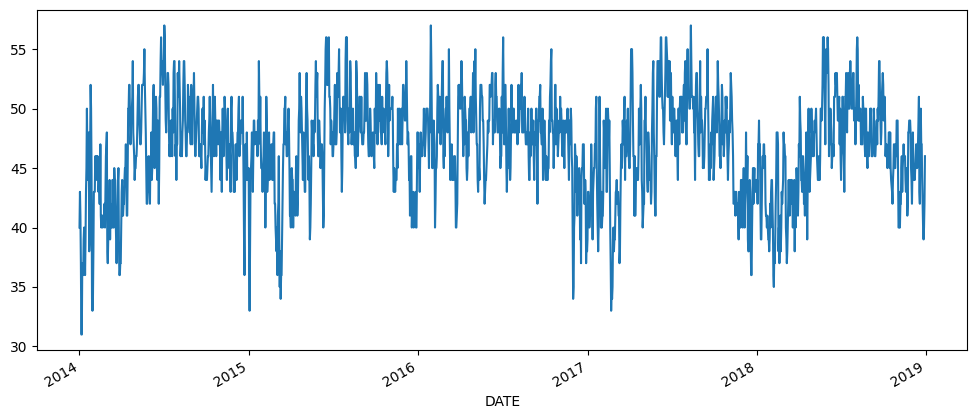

In [37]:
data_set['AvgTemp'].plot(figsize=(12,5))

In [38]:
# Check for Stationarity

from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):

    test = adfuller(dataset, autolag='AIC')
    print("1: ADF :", test[0])
    print("2: p-value :", test[1])
    print("3: Number of Lags :", test[2])
    print("4: Number of Observations used for ADF Regression and Critical Values Calculations", test[3])
    print("5: Critical Values :")
    for key, val in test[4].items():
        print('\t', key, ": ", val)

In [39]:
ad_test(data_set['AvgTemp'])

1: ADF : -6.554680125068738
2: p-value : 8.675937480201557e-09
3: Number of Lags : 12
4: Number of Observations used for ADF Regression and Critical Values Calculations 1808
5: Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


In [40]:
import pmdarima

In [41]:
stepwise_fit = pmdarima.auto_arima(data_set['AvgTemp'], trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.146, Time=0.79 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=0.52 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=0.60 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.302, Time=0.95 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.537, Time=1.02 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.190, Time=1.00 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8309.520, Time=1.23 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.294, Time=1.22 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.468, Time=1.40 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8305.833, Time=1.30 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

In [42]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.606
Date:                Wed, 12 Jul 2023   AIC                           8295.213
Time:                        16:51:26   BIC                           8339.270
Sample:                             0   HQIC                          8311.466
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2803      0.380      3.371      0.001       0.536       2.025
ar.L1          0.9724      0.008    118.817      0.000       0.956       0.988
ma.L1         -0.1218      0.024     -5.113      0.000      -0.169      -0.075
ma.L2         -0.2180      0.024     -9.000      0.000      -0.266      -0.171
ma.L3         -0.2025      0.024     -8.451      0.000      -0.249      -0.156
ma.L4         -0.1361      0.023     -5.973      0.000      -0.181      -0.091
ma.L5         -0.0489      0.024     -2.006      0.045      -0.097      -0.001
sigma2         5.4982      0.172     31.944      0.000       5.161       5.836
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                20.82
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
from statsmodels.tsa.arima.model import ARIMA

In [49]:
# Split Data into Training and Testing Set

train_set = data_set.iloc[:-30]
test_set = data_set.iloc[-30:]

print(train_set.shape)
print(test_set.shape)

(1791, 5)
(30, 5)


In [50]:
model = ARIMA(train_set['AvgTemp'], order=(1,0,5))
model = model.fit()
model.summary()

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Wed, 12 Jul 2023   AIC                           8156.395
Time:                        16:59:52   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
start = len(train_set)
end = start + len(test_set)-1
pred = model.predict(start=start, end=end, type='levels')

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [66]:
print(pred)


1791    44.754109
1792    44.987795
1793    45.388741
1794    45.721546
1795    45.863733
1796    45.874126
1797    45.884370
1798    45.894466
1799    45.904417
1800    45.914225
1801    45.923891
1802    45.933419
1803    45.942809
1804    45.952064
1805    45.961185
1806    45.970176
1807    45.979036
1808    45.987770
1809    45.996377
1810    46.004861
1811    46.013222
1812    46.021463
1813    46.029586
1814    46.037591
1815    46.045482
1816    46.053258
1817    46.060923
1818    46.068477
1819    46.075923
1820    46.083261
Name: predicted_mean, dtype: float64


In [67]:
pred.index = data_set.index[start:end+1]
pred

DATE
2018-12-01    44.754109
2018-12-02    44.987795
2018-12-03    45.388741
2018-12-04    45.721546
2018-12-05    45.863733
2018-12-06    45.874126
2018-12-07    45.884370
2018-12-08    45.894466
2018-12-09    45.904417
2018-12-10    45.914225
2018-12-11    45.923891
2018-12-12    45.933419
2018-12-13    45.942809
2018-12-14    45.952064
2018-12-15    45.961185
2018-12-16    45.970176
2018-12-17    45.979036
2018-12-18    45.987770
2018-12-19    45.996377
2018-12-20    46.004861
2018-12-21    46.013222
2018-12-22    46.021463
2018-12-23    46.029586
2018-12-24    46.037591
2018-12-25    46.045482
2018-12-26    46.053258
2018-12-27    46.060923
2018-12-28    46.068477
2018-12-29    46.075923
2018-12-30    46.083261
Name: predicted_mean, dtype: float64

<AxesSubplot: xlabel='DATE'>

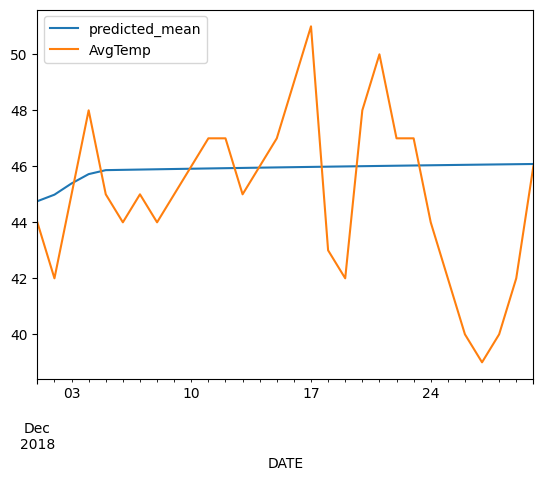

In [68]:
pred.plot(legend=True)
test_set['AvgTemp'].plot(legend=True)

In [69]:
import math
from sklearn.metrics import mean_squared_error

In [70]:
rmse = math.sqrt(mean_squared_error(pred, test_set['AvgTemp']))
rmse

3.0004639075226445

In [71]:
test_set['AvgTemp'].mean()

45.0

In [72]:
# Training model on complete dataset to make future predictions

model2 = ARIMA(data_set['AvgTemp'], order=(1,0,5))
model2 = model2.fit()

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [73]:
data_set.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


In [74]:
# Future days for Plotting

index_future_dates = pd.date_range(start='2018-12-30', end='2019-01-29')
index_future_dates

DatetimeIndex(['2018-12-30', '2018-12-31', '2019-01-01', '2019-01-02',
               '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-12', '2019-01-13', '2019-01-14',
               '2019-01-15', '2019-01-16', '2019-01-17', '2019-01-18',
               '2019-01-19', '2019-01-20', '2019-01-21', '2019-01-22',
               '2019-01-23', '2019-01-24', '2019-01-25', '2019-01-26',
               '2019-01-27', '2019-01-28', '2019-01-29'],
              dtype='datetime64[ns]', freq='D')

In [75]:
future_pred = model2.predict(start=len(data_set), end=len(data_set)+30, typ='levels').rename('ARIMA Predictions')
future_pred

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


1821    46.418166
1822    46.113912
1823    45.617874
1824    45.249566
1825    45.116916
1826    45.136667
1827    45.156141
1828    45.175342
1829    45.194275
1830    45.212944
1831    45.231350
1832    45.249500
1833    45.267395
1834    45.285040
1835    45.302438
1836    45.319593
1837    45.336507
1838    45.353185
1839    45.369630
1840    45.385844
1841    45.401832
1842    45.417596
1843    45.433139
1844    45.448465
1845    45.463576
1846    45.478476
1847    45.493168
1848    45.507654
1849    45.521937
1850    45.536020
1851    45.549907
Name: ARIMA Predictions, dtype: float64

In [76]:
# Indexing on basis of dates 

future_pred.index = index_future_dates

In [77]:
future_pred

2018-12-30    46.418166
2018-12-31    46.113912
2019-01-01    45.617874
2019-01-02    45.249566
2019-01-03    45.116916
2019-01-04    45.136667
2019-01-05    45.156141
2019-01-06    45.175342
2019-01-07    45.194275
2019-01-08    45.212944
2019-01-09    45.231350
2019-01-10    45.249500
2019-01-11    45.267395
2019-01-12    45.285040
2019-01-13    45.302438
2019-01-14    45.319593
2019-01-15    45.336507
2019-01-16    45.353185
2019-01-17    45.369630
2019-01-18    45.385844
2019-01-19    45.401832
2019-01-20    45.417596
2019-01-21    45.433139
2019-01-22    45.448465
2019-01-23    45.463576
2019-01-24    45.478476
2019-01-25    45.493168
2019-01-26    45.507654
2019-01-27    45.521937
2019-01-28    45.536020
2019-01-29    45.549907
Freq: D, Name: ARIMA Predictions, dtype: float64

<AxesSubplot: >

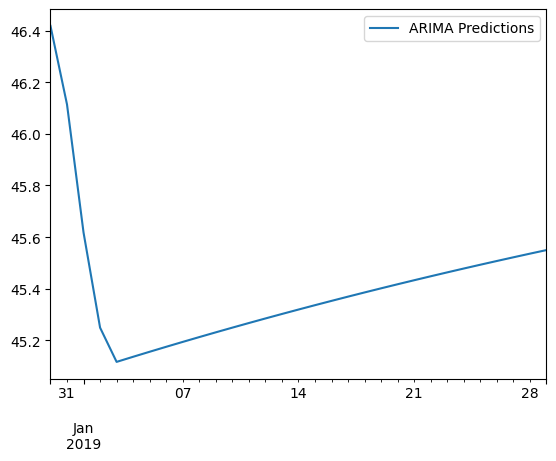

In [78]:
future_pred.plot(legend=True)